# Lab Assignment Three: Extending Logistic Regression

## Team Members
1. Piyush Metkar  - 47509180
2. Rishab Vaishya - 47505527
3. Dhaval Gogri   - 47444609


# 1. PREPARATION AND OVERVIEW

## 1.1 Business Understanding

The dataset **Grade Prediction** is taken from the Professor Moody Prediction dataset and it is about the behaviour of students and their grades they received in his class. Professor Moody observed various behavioural aspects of his students such as how much involvement they have in the class, how punctual are they and how much focus they had in the class. He quantified these aspects as 'never', 'rarely', 'always', etc.. He also added their grades to observe what impact their behaviour had on them. The dataset has a file with around 1000 instances.

The source of the dataset is as follows: https://www.kaggle.com/c/grade-prediction

The aim of this project is to predict the academic performance of students and **classify** them as per grades depending on their behaviour in class. The target class of this dataset is **Grades** column which is categorized in values A, B, C, D and F. 

We all know how much important the role of education is in the society. Analyzing some of the behavioral patterns of a student can help us gain an insight on their **academic performance of the future**. This information can be useful for faculty members to identify student which needs extra help with the course. It can be useful for parents who can predict how well their child is expected to perform in their academics. Students themseleves can also analyze their behavior and implement changes in order to increase their success chances.

On a broader level, It is useful for the university to know how their students are likely to behave & their competance against students of other universities. Since education is a vital part of the society in order to successfully mould the next generation of people. 

Many curious questions can be answered like reason for a students poor performance even after 100% attandance in the class. Percentage of people who manage to score good grades even after bunking a lot of lectures. Why do people score less even after clearing their doubts from professor. The results may not be what we generally assume.

Based on the analysis and predictin of this data, Universities may also impose some restrictions and help students become successful in academics, for example not allowing the use of cell phones during lectures to help them concentrate on lectures and understand the important concepts.

Assuming human behaviour is more or less consistent in majority of societies & times. These predictions can be scaled to different regions and also can be used in the coming future.

## 1.2 Data Preparation 


In [53]:
import pandas as pd
import numpy as np

df = pd.read_csv('file:///Users/piyushmetkar/Documents/SMU/Notes/Spring 18/7324 Machine Learning in Python/Lab 3/moody_training_data.csv') 

df.head()

,STUDENTID,SCORE,GRADE,ASKSQUESTIONS,TEXTINGINCLASS,LATEINCLASS
0,65446,23.67,D,never,always,never
1,79686,8.41,F,never,never,rarely
2,56400,69.76,C,never,always,rarely
3,16792,95.51,A,never,always,always
4,92195,67.12,B,frequently,sometimes,never


We import the CSV data file into pandas dataframe object. We will extract the values of columns from df into numpy arrays required for classification.

The grades column is categorized as A, B, C, D and F as per the value of scores. We don't need the exact values of thier scores rather we are interested in grades. Hence we do not include the Score and StudentID columns.

The behaviour of the students such as do they use phones, do they ask questions and are they punctual are quantified in words 'never', 'sometimes', 'rarely', 'frequently' and 'always'. Based on their meaning, we can compare the words as follows since they are **ordinal**:

never < sometimes/rarely < frequently < always

Hence we replace these values with integers. 

We also replace all the grades in target class which is also of type **ordinal** with integers. Grades A, B, C, D and F are replaced by 0, 1, 2, 3 and 4 repectively. This will also help us to compare the grade.

Our dataset has only 3 features and hence we don't need to perform any dimensionality reduction technique on it. Also our data doesn't have any missing values.

In [54]:
df['ASKSQUESTIONS'].replace(['never', 'rarely', 'sometimes', 'frequently', 'always'], [0, 1, 1, 2, 3],inplace=True)
df['TEXTINGINCLASS'].replace(['never', 'rarely', 'sometimes', 'frequently', 'always'], [0, 1, 1, 2, 3],inplace=True)
df['LATEINCLASS'].replace(['never', 'rarely', 'sometimes', 'frequently', 'always'], [0, 1, 1, 2, 3],inplace=True)
df['GRADE'].replace(['A', 'B', 'C', 'D', 'F'], [0, 1, 2, 3, 4],inplace=True)

#ref : https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
X = df.iloc[:, [3, 4, 5]].values
y = df['GRADE'].values
class_names = np.asarray(['A', 'B', 'C', 'D', 'F']) 

print(X.shape)
print(y.shape)

(998, 3)
(998,)


The final dataset contains 3 columns ASKSQUESTIONS, TEXTINGINCLASS and LATEINCLASS and have removed redundant columns. We have replaced all the ordinal values with integers. There are around 1000 instances present in the data.

## 1.3 Data division
Let's divide the data in **80:20** ratio, 80% being training data and 20% being test data.

### Cross Validation
However, in order to divide the data, we need to make sure that the results are not biased in any cluster and it is consistent throughout the dataset. We are using **K Fold Cross-Validation** technique to verify the consistency in data.

The following algorithm works by dividing the dataset in **K=5** parts. For each iteration, 1 part becomes the test set and the remaining 4 parts become the train set. We create a new model for each iteration by using these 4 parts of the train set and thus verify it against the current test set.

In [55]:
from sklearn.model_selection import KFold # import KFold
from sklearn import linear_model
from sklearn.metrics import accuracy_score

#ref: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

kf = KFold(n_splits=5) # Define the split - into 5 folds

lm = linear_model.LinearRegression()
sum = 0

for train_index, test_index in kf.split(X):
    
    Xk_train, Xk_test = X[train_index], X[test_index]
    yk_train, yk_test = y[train_index], y[test_index]
    
    model = lm.fit(Xk_train, yk_train)
    yk_hat = lm.predict(Xk_test)
    acc = accuracy_score(yk_test,yk_hat.astype(int))
    print('Accuracy : ', acc)
    sum += acc 

print('\nAverage :', sum/5)
 


Accuracy :  0.41
Accuracy :  0.43
Accuracy :  0.42
Accuracy :  0.457286432160804
Accuracy :  0.507537688442211

Average : 0.444964824120603


As we can see, all the iterations have very similar accuracy. This proves that the data is consistent throughout and hence we can split the data in to 80:20 ratio for test purposes. 

In [56]:

# ref: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (798, 3)
y_train: (798,)
X_test: (200, 3)
y_test: (200,)


# 2. MODELING

## 2.1 Implementing Logistic Regression

Now that we have cleansed and prepared our dataset, It is ready for implementing Logistic regression. In the following code, We have created many types of binary logistic regression class which will be used in their multi-class regression implementation.

Source for the follwing code :- https://github.com/eclarson/MachineLearningNotebooks/blob/master/05.%20Logistic%20Regression.ipynb

## Vector Binary Logistic Regression

This class for vector Binary logistic regression is defined below.

It has the following function :
1. private init
2. static add_bias
3. public predict_proba
4. predict
5. private str
6. public fit
7. static sigmoid - this using the expit function which is imported in this block
8. get_gradient

In [57]:
import numpy as np
from scipy.special import expit
from sklearn.metrics import accuracy_score

class VectorBinaryLogisticRegression:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
 
     #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
       
    # public:
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

            
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        return gradient.reshape(self.w_.shape)
            


## Multi-class Logistic Regression using Vector Binary Logistic Regression

Here in LogisticRegression class defined below, we are using the Vector Logistic Regression class which are used for binary class and running it for each unique classes in the datasets (which in our case is the grades) in order to implement it for multi-class using **one-versus-all** method.

It has the following functions :
1. private init
2. private str
3. public fit
4. public predict_proba
5. predict

we are creating the object of this class at the bottom of this block and put our dataset into the model.

In [58]:
%%time

class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return np.argmax(self.predict_proba(X),axis=1) # take argmax along row
    

lr = LogisticRegression(0.1,100)
lr.fit(X,y)
print(lr)

yhat = lr.predict(X)
print('Accuracy of: ',accuracy_score(y,yhat))

MultiClass Logistic Regression Object with coefficients:
[[-0.87998841  0.31613403 -0.63841979 -0.45318077]
 [-0.66946037  0.2254335  -0.28230821 -0.19574956]
 [-0.08035863 -0.67026008  0.10425792 -0.3120305 ]
 [-0.6181635  -0.5091668  -0.28173579 -0.05065689]
 [-0.77271206 -0.32667687 -0.35974249 -0.03898311]]
Accuracy of:  0.44288577154308617
CPU times: user 26.4 ms, sys: 234 µs, total: 26.6 ms
Wall time: 26.6 ms


here we see that Multi-class Logistic Regression using Vector Binary Logistic Regression took 32.3 Seconds to execute and gives us an accuracy of 43.68 %

## 2.1.1 Optimized Logistic Regression

The following class will be used to optimize logistic regression and use it for datasets with multi unique classes.

Source for the follwing code :- https://github.com/eclarson/MachineLearningNotebooks/blob/master/06.%20Optimization.ipynb
 
## Binary Logistic Regression Base Class
 
This is the **base class** for all the following classes which will help us in optimizing logistic regression implementation
 
It has the following function :
1. private init
2. private str
3. static add_bias
4. static sigmoid - this using the expit function which is imported in this block
5. get_gradient
6. public predict_proba
7. predict
8. public fit


In [59]:
%%time
# from last time, our logistic regression algorithm is given by (including everything we previously had):
class BinaryLogisticRegression:
    def __init__(self, eta, iterations=20, C=0.001):
        self.eta = eta
        self.iters = iterations
        self.C = C
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    # convenience, private:
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # vectorized gradient calculation with regularization using L2 Norm
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return gradient
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 
            

CPU times: user 56 µs, sys: 1 µs, total: 57 µs
Wall time: 63.2 µs


## Line Search Logistic Regression

This class defines the optimization technique we can use for logistic regression using **Line search**. This class is designed to work for datasets having binary classes. This class will be further used for datasets with multi-class

As this class inherits most of it's features from **BinaryLogisticRegression** class
We only modify what's needed to optimize it using line search.

Fit is the only modified functions which now implements line search function


In [60]:
%%time
# and we can update this to use a line search along the gradient like this:
from scipy.optimize import minimize_scalar
import copy
class LineSearchLogisticRegression(BinaryLogisticRegression):
    
    # define custom line search for problem
    @staticmethod
    def line_search_function(eta,X,y,w,grad,C):
        wnew = w + grad*eta
        yhat = (1/(1+np.exp(-X @ wnew)))>0.5
        return np.sum((y-yhat)**2)-C*np.sum(wnew**2)
        
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            
            # do line search in gradient direction, using scipy function
            opts = {'maxiter':self.iters/20} # unclear exactly what this should be
            res = minimize_scalar(self.line_search_function, # objective function to optimize
                                  bounds=(self.eta/1000,self.eta*10), #bounds to optimize
                                  args=(Xb,y,self.w_,gradient,self.C), # additional argument for objective function
                                  method='bounded', # bounded optimization for speed
                                  options=opts) # set max iterations
            
            eta = res.x # get optimal learning rate
            self.w_ += gradient*eta # set new function values
                

CPU times: user 41 µs, sys: 1 µs, total: 42 µs
Wall time: 45.1 µs


## Stochastic Logistic Regression

This class defines the optimization technique we can use for logistic regression using **Stochastic** method. This class is designed to work for datasets having binary classes. This class will be further used for datasets with multi-class

As this class inherits most of it's features from **BinaryLogisticRegression** class
We only modify what's needed to optimize it using Stochastic method.

Gradient is modified in this method.


In [61]:
%%time
class StochasticLogisticRegression(BinaryLogisticRegression):
    # stochastic gradient calculation 
    def _get_gradient(self,X,y):
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return gradient 

CPU times: user 45 µs, sys: 1e+03 ns, total: 46 µs
Wall time: 51 µs


## Hessian Binary Logistic Regression


This class defines the optimization technique we can use for logistic regression using **Hessian** method. This class is designed to work for datasets having binary classes. This class will be further used for datasets with multi-class

As this class inherits most of it's features from **BinaryLogisticRegression** class
We only modify what's needed to optimize it using Hessian method.

Gradient is once again modified in this method to calculate hessian.


In [62]:
%%time
from numpy.linalg import pinv
class HessianBinaryLogisticRegression(BinaryLogisticRegression):
    # just overwrite gradient function
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return pinv(hessian) @ gradient
       

CPU times: user 54 µs, sys: 1 µs, total: 55 µs
Wall time: 60.1 µs


## BFGS Binary Logistic Regression

This class defines the optimization technique we can use for logistic regression using **quasi-Newton** methods is known as Broyden-Fletcher-Goldfarb-Shanno (BFGS). This class is designed to work for datasets having binary classes. This class will be further used for datasets with multi-class

As this class inherits most of it's features from **BinaryLogisticRegression** class
We only modify what's needed to optimize it using Hessian method.

for this, we won't perform our own BFGS implementation since it takes a good deal of code and understanding of the algorithm
luckily for us, scipy has its own BFGS implementation **fmin_bfgs**.


In [63]:
%%time

from scipy.optimize import fmin_bfgs
class BFGSBinaryLogisticRegression(BinaryLogisticRegression):
    
    @staticmethod
    def objective_function(w,X,y,C):
        g = expit(X @ w)
        return -np.sum(np.log(g[y==1]))-np.sum(np.log(1-g[y==0])) + C*np.sum(w**2) #-np.sum(y*np.log(g)+(1-y)*np.log(1-g)) #-np.sum(y*np.log(g)+(1-y)*np.log(1-g))

    @staticmethod
    def objective_gradient(w,X,y,C):
        g = expit(X @ w)
        ydiff = y-g # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        gradient[1:] += -2 * w[1:] * C
        return -gradient
    
    # just overwrite fit function
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = fmin_bfgs(self.objective_function, # what to optimize
                            np.zeros((num_features,1)), # starting point
                            fprime=self.objective_gradient, # gradient function
                            args=(Xb,y,self.C), # extra args for gradient and objective function
                            gtol=1e-03, # stopping criteria for gradient, |v_k|
                            maxiter=self.iters, # stopping criteria iterations
                            disp=False)
        
        self.w_ = self.w_.reshape((num_features,1))
            

CPU times: user 42 µs, sys: 0 ns, total: 42 µs
Wall time: 46 µs


## Multi-Class Logistic Regression

Here is the class which uses all of the above classes. The above classes was designed for datasets with binary classes. This class is class which will implement optimized logistic regression for multi-class datasets.

The way to do it to implement binary methods for each unique class of the datasets using **one-versus-all** method.

**note:** this class is modified from the source to include an extra parameter for the class called solver (optimization Technique)

by adding this parameter we make this class generic to implement all types of optimized techniques by just providing the technique name in the solver prameter.

In [64]:
class MultiClassLogisticRegression:
    def __init__(self, eta, iterations=20, C=0.0001, solver=""):
        self.optimizationTechnique = solver
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.classifiers_ = []
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y)) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = []
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            
            # According the optimization Technique provided, the method will select the appropriate technique to implement.
            if self.optimizationTechnique == "steepest descent":
                hblr = LineSearchLogisticRegression(self.eta,self.iters,self.C)
            elif self.optimizationTechnique == "stochastic gradient descent":
                hblr = StochasticLogisticRegression(self.eta,self.iters,self.C)
            elif self.optimizationTechnique == "Newtons method":
                hblr = HessianBinaryLogisticRegression(self.eta,self.iters,self.C)
            else :
                hblr = BFGSBinaryLogisticRegression(self.eta,self.iters,self.C)
            
            hblr.fit(X,y_binary)
            #print(accuracy(y_binary,hblr.predict(X)))
            # add the trained classifier to the list
            self.classifiers_.append(hblr)
            
        print("Using "+self.optimizationTechnique+" optimization technique")
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for hblr in self.classifiers_:
            probs.append(hblr.predict_proba(X).reshape((len(X),1))) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return np.argmax(self.predict_proba(X),axis=1) # take argmax along row
    



## Implementing Stochastic Logistic Regression for multi class

the following code implements the Stochastic method for multi-class datasets.we add the parameter 'solver' which tells the MultiClassLogisticRegression class which technique to use. In this case it is stochastic gradient descent.

In [65]:
%%time

lr = MultiClassLogisticRegression(eta=0.01,iterations=250,C=0.02,solver="stochastic gradient descent")
lr.fit(X,y)
print(lr)

yhat = lr.predict(X)
print('Accuracy of: ',accuracy_score(y,yhat))

Using stochastic gradient descent optimization technique
MultiClass Logistic Regression Object with coefficients:
[[-4.55265635e-01 -2.52714858e-04 -4.01991282e-01 -4.76274162e-01]
 [-3.13630622e-01 -3.83386279e-02 -3.18237803e-01 -2.05401919e-01]
 [-1.18825338e-01 -3.13633975e-01 -2.86548183e-02 -2.25310451e-01]
 [-3.54330969e-01 -2.05592593e-01 -2.50790144e-01 -2.17214521e-01]
 [-4.53907902e-01 -1.60282996e-01 -4.95840352e-01 -1.98951040e-01]]
Accuracy of:  0.4168336673346693
CPU times: user 30.3 ms, sys: 4.01 ms, total: 34.3 ms
Wall time: 31.6 ms


After multiple tests we conclude the general performance for Multi-Class Logistic Regression using stochastic gradient descent

**Accuracy** = 41.6833%

**Wall time** = 28.4ms

## Implementing Newton's method of Logistic Regression for multi class

In [66]:
%%time

lr = MultiClassLogisticRegression(eta=0.01,iterations=1,C=0.01,solver="Newtons method")
lr.fit(X,y)
print(lr)

yhat = lr.predict(X)
print('Accuracy of: ',accuracy_score(y,yhat))

Using Newtons method optimization technique
MultiClass Logistic Regression Object with coefficients:
[[-1.98064635e-02  7.05131050e-03  2.71936482e-04  5.71230538e-05]
 [-1.54881355e-02  5.80600853e-03  4.39676018e-04  2.68246822e-04]
 [ 1.72521647e-03 -8.51125749e-03  2.68680863e-04 -2.92097311e-03]
 [-1.10953947e-02 -3.66659726e-03 -7.26142678e-04  9.95470364e-04]
 [-1.53399666e-02 -6.85069056e-04 -2.53593418e-04  1.60107846e-03]]
Accuracy of:  0.4338677354709419
CPU times: user 14.3 ms, sys: 7.3 ms, total: 21.6 ms
Wall time: 18.1 ms


After multiple tests we conclude the general performance for Multi-Class Logistic Regression using Newton's method.

**Accuracy** = 43.38677%

**Wall time** = 21.8ms

## Implementing Steepest descent Logistic Regression for multi class

In [67]:
%%time
lr = MultiClassLogisticRegression(eta=0.1,iterations=100,C=0.01,solver="steepest descent")
lr.fit(X,y)
print(lr)

yhat = lr.predict(X)
print('Accuracy of: ',accuracy_score(y,yhat))

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

After multiple tests we conclude the general performance for Multi-Class Logistic Regression using steepest descent method.

**Accuracy** = 43.38677%

**Wall time** = 15.5ms

## Implementing BFGS Logistic Regression for multi class

In [68]:
%%time
lr = MultiClassLogisticRegression(_,iterations=8,C=0.00001,solver="default : BFGSBinaryLogisticRegression")
lr.fit(X,y)
print(lr)

yhat = lr.predict(X)
print('Accuracy of: ',accuracy_score(y,yhat))

Using default : BFGSBinaryLogisticRegression optimization technique
MultiClass Logistic Regression Object with coefficients:
[[-2.79735955  1.67193212 -0.27891235 -0.06108742]
 [-1.98100158  0.88326233  0.04605101  0.01939509]
 [-0.01936545 -1.32987119  0.09907226 -0.28550663]
 [-1.10708299 -0.99035353 -0.17666083  0.14876605]
 [-1.695089   -0.64986193 -0.17750906  0.29961125]]
Accuracy of:  0.44589178356713427
CPU times: user 12.5 ms, sys: 1.29 ms, total: 13.8 ms
Wall time: 13.3 ms


After multiple tests we conclude the general performance for Multi-Class Logistic Regression using BFGS Binary Logistic Regression method. This is the most optimized method we found till now.

**Accuracy** = 44.5891%

**Wall time** = 9.93ms

## Implementing Parallel Multi-Class Logistic Regression

In [69]:
%%time
# its still faster! Can we fix that?
from joblib import Parallel, delayed

class ParallelMultiClassLogisticRegression(MultiClassLogisticRegression):
    @staticmethod
    def par_logistic(yval,eta,iters,C,X,y):
        y_binary = y==yval # create a binary problem
        # train the binary classifier for this class
        hblr = BFGSBinaryLogisticRegression(eta,iters,C)
        hblr.fit(X,y_binary)
        return hblr
    
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y)) # get each unique class value
        num_unique_classes = len(self.unique_)
        backend = 'threading' #'multiprocessing'
        
        self.classifiers_ = Parallel(n_jobs=-1,backend=backend)(
            delayed(self.par_logistic)(yval,self.eta,self.iters,self.C,X,y) for yval in self.unique_)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
plr = ParallelMultiClassLogisticRegression(eta=0.1,iterations=10,C=0.0001)
plr.fit(X,y)
print(plr)

yhat = plr.predict(X)
print('Accuracy of: ',accuracy_score(y,yhat))

MultiClass Logistic Regression Object with coefficients:
[[-2.95989091  1.41202123 -0.06527353 -0.13861302]
 [-1.98207074  0.82150336  0.08760012  0.01893103]
 [ 0.11988921 -1.3367515   0.04195428 -0.28071492]
 [-1.13187242 -0.94949032 -0.13695808  0.12596788]
 [-1.8206801  -0.50644521 -0.04571948  0.24531483]]
Accuracy of:  0.43887775551102204
CPU times: user 24.6 ms, sys: 11.6 ms, total: 36.3 ms
Wall time: 105 ms


After multiple tests we conclude the general performance for Multi-Class Logistic Regression using parallel computing method.

**Accuracy** = 43.8877%

**Wall time** = 111ms


by this we tried out all optimization techniques for logestic regression.

# Implementing SKLearn for Grade prediction Dataset

Now, the following code implements logistic regression with inbuilt optimization of SKLearn which is considered the best because the library uses all the optimization possible implicitly and provides with best results.

In [70]:
%%time
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.metrics import accuracy_score

lr_sk = SKLogisticRegression() # all params default

lr_sk.fit(X,y)
print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(X)
print('Accuracy of: ',accuracy_score(y,yhat))

[[-3.47136578e+00  1.52762926e+00 -2.98414809e-03 -2.66714221e-02]
 [-1.92002204e+00  7.65513020e-01  5.68552637e-02  3.41656803e-02]
 [ 2.56599419e-01 -1.34308210e+00  2.82133299e-02 -3.55571410e-01]
 [-1.23290455e+00 -7.66504535e-01 -1.24248538e-01  1.52433002e-01]
 [-1.96238758e+00 -1.55973303e-01 -6.42861845e-02  2.83957963e-01]]
Accuracy of:  0.43687374749499
CPU times: user 6.34 ms, sys: 1.3 ms, total: 7.65 ms
Wall time: 6.6 ms


As we saw, SKLearn implimentation provides the fastest Wall time and accuracy level among the highest.


**Accuracy** = 43.6873%

**Wall time** = 6.4 ms


## 2.1.2 L1, L2 Regularization for Gradient Calculation

Let's observe the difference between the difference the predicted values and the actual values. We will change the values of C and implement L1 and L2 regularization to see the impact on the gradient calculation of the optimization technique.

L1 regularization calculates the sum of difference between corresponding elements of two vectors. Whereas L2 regularization calculates the sum of square of difference between corresponding elements of the two vectors. Prediction is considered to be accurate when the difference between the predicted and actual values is less. Hence we aim for low values of L1 and L2.

For this purpose we are considering the Stochastic Gradient Descent Optimization Technique.

In [71]:
def L1(y, y_hat):
    return np.sum(abs(y-y_hat))

def L2(y, y_hat):
    return np.sum((y-y_hat)*(y-y_hat))

In [72]:
lr = MultiClassLogisticRegression(eta=0.01,iterations=100,C=0.1,solver="stochastic gradient descent")
lr.fit(X,y)
print(lr)

yhat = lr.predict(X)
print('Accuracy for C: 0.1: ',accuracy_score(y,yhat))
print('L1:', L1(y,yhat))
print('L2:', L2(y,yhat))

lr = MultiClassLogisticRegression(eta=0.01,iterations=100,C=0.5,solver="stochastic gradient descent")
lr.fit(X,y)
print(lr)

yhat = lr.predict(X)
print('Accuracy for C: 0.5: ',accuracy_score(y,yhat))
print('L1:', L1(y,yhat))
print('L2:', L2(y,yhat))

lr = MultiClassLogisticRegression(eta=0.01,iterations=100,C=0.9,solver="stochastic gradient descent")
lr.fit(X,y)
print(lr)

yhat = lr.predict(X)
print('Accuracy for C: 0.9: ',accuracy_score(y,yhat))
print('L1:', L1(y,yhat))
print('L2:', L2(y,yhat))

Using stochastic gradient descent optimization technique
MultiClass Logistic Regression Object with coefficients:
[[-0.24283516 -0.06376118 -0.24027126 -0.18787609]
 [-0.22305601 -0.05785757 -0.22499    -0.11944182]
 [-0.14317561 -0.13472175 -0.09223064 -0.17633468]
 [-0.18952486 -0.04710843 -0.2329258  -0.15368992]
 [-0.21434512 -0.08233474 -0.28903417 -0.14756328]]
Accuracy for C: 0.1:  0.3727454909819639
L1: 968
L2: 1766
Using stochastic gradient descent optimization technique
MultiClass Logistic Regression Object with coefficients:
[[-0.27834351 -0.03196225 -0.21723079 -0.19125755]
 [-0.21346744  0.01542295 -0.20570093 -0.14099688]
 [-0.08423978 -0.07276625  0.02068526 -0.12392385]
 [-0.1890205  -0.07199379 -0.17464047 -0.15754171]
 [-0.23312627 -0.06535345 -0.23428604 -0.16701059]]
Accuracy for C: 0.5:  0.3807615230460922
L1: 846
L2: 1306
Using stochastic gradient descent optimization technique
MultiClass Logistic Regression Object with coefficients:
[[-0.30959171 -0.01544155 -0.1

It is observed that for Stochastic gradient descent, as we increase the value of C from 0.1 the L1 and L2 values also increases. That means the accuracy of predicted values is decreasing with increase in C.

## 2.2 Classifier's Performance Based on Parameters Investigated

After implementing the above optimization techniques for logistic regression, we found that BFGS is most suitable for our grade prediction model. So we decided to visualize the performance of this classifier and optimizer i.e it's accuracy against parameters which are regulation term and number of iterations. We executed the classifier by tuning the parameter values and collected about 25 samples. 

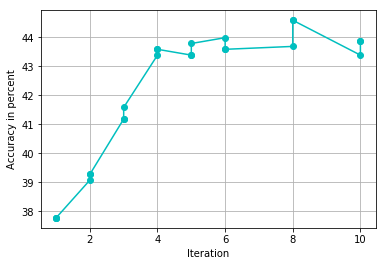

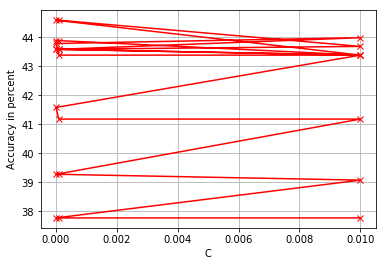

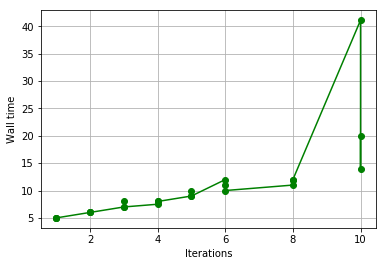

In [73]:
#ref - https://stackoverflow.com/questions/39715601/how-to-create-a-line-chart-using-matplotlib
import matplotlib.pyplot as plt

df_obv = pd.read_csv('file:///Users/piyushmetkar/Documents/SMU/Notes/Spring 18/7324 Machine Learning in Python/Lab 3/observations.csv') 


df_obv.head()

C = df_obv['C'].values
itrn = df_obv['Iterations'].values
accr = df_obv['Accuracy'].values
wt = df_obv['Walltime'].values

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
ax1.plot(itrn, accr, label='Component 1', color='c', marker='o')
ax1.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Accuracy in percent')
plt.show()

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
ax1.plot(C, accr, label='Component 1', color='r', marker='x')
ax1.grid(True)
plt.xlabel('C')
plt.ylabel('Accuracy in percent')
plt.show()

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
ax1.plot(itrn, wt, label='Component 1', color='g', marker='o')
ax1.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Wall time')
plt.autoscale()
plt.show()

From the above 3 graph we can have serveral conclusions. In our classifier we observed that as we increase the number of iterations the accuracy level keeps increasing at a certain point. Iteration at this point is 8. After this the accuracy level fluctuate around tht range as we further increase the iterations. SO we kept the iteration number for our chosen classifier as 8.

In the second graph we see accuracy level all scattered around the graph, this indicates that the dependancy of accuracy & time is not that consistant with the regulation term 'c'. After multiple observations we decided to move forward with 'c' value as 0.00001.

The 3rd graph shows us that wall time is directly proportional to the number of iterations. SO this comes down to the requiement of the model as what is more important to us Accuracy or the speed. 

In the grade prediction model, we would consider accuracy to be of more priority over Wall time.


## 2.3 Comparing Optimization Techniques

From all the above multiclass logistic regression we performed the results can be summarized into the following table.





Now looking at the table, let's analyse the results. For the analysis, we are using scatter plot where the X axis is accuracy percent and Y axis is wall time in milliseconds of the various optimization techniques we used for logistic regression.



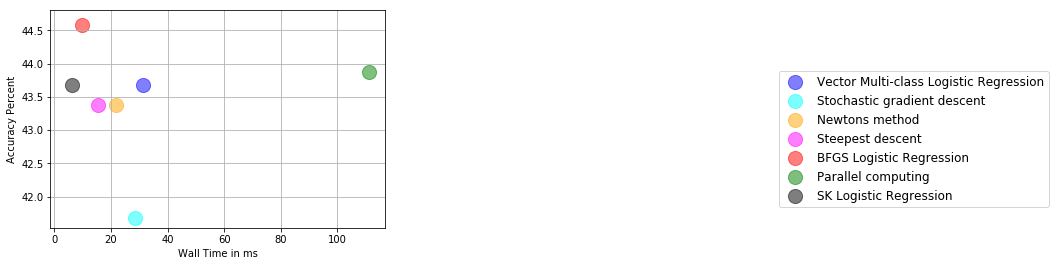

In [74]:

import matplotlib.pyplot as plt

npacc = np.asarray([43.68, 41.68, 43.38, 43.38, 44.58, 43.88, 43.68])
npwt = np.asarray([31.4, 28.4, 21.8, 15.5, 9.93, 111, 6.4])
nplabels = np.asarray(['Vector Multi-class Logistic Regression', 'Stochastic gradient descent', 'Newton''s method', 'Steepest descent', 'BFGS Logistic Regression', 'Parallel computing', 'SK Logistic Regression'])

colors = ['blue', 'cyan', 'orange', 'magenta', 'red', 'green', 'black']

fig, ax = plt.subplots()
i = 0
for color in ['blue', 'cyan', 'orange', 'magenta', 'red', 'green', 'black']:
    scale = 200
    ax.scatter(npwt[i], npacc[i], c=colors[i], s=scale, label=nplabels[i], alpha=0.5)
    i=i+1

ax.legend(prop={'size': 12},bbox_to_anchor=(3.0,0.75))
ax.grid(True)
plt.xlabel("Wall Time in ms")
plt.ylabel("Accuracy Percent")

plt.show()


From the graph, we can see that **Sci-kit learn** is the fastest compared to  all our implementations with walltime of 6.4 ms and gives the accuracy of 43.68%. Our best optimization which turns out to be **BFGS Logistic Regression** gives us the highest accuracy percent compared to all our implementations and sci-kit learn. The walltime is slightly more than sci-kit learn at 9.93 ms.

Stochastic Gradient Descent is directly proportional to the number of iterations which also increases the walltime. So in our case with 250 iterations we get least accuracy here. However we can increase this accuracy at the expense of wall time. This technique is not recommended for our model since we already found a technique with better accuracy and time.

Parallel Computing was found to take the most wall time i.e 111 ms. Generally parallel computing is most suitable for large number of features and unique classes. Our data has comparativley has only 3 features and works better with sequential computing techniques.

Rest all the other techniques were found to give more or less same accuracy with slight difference in wall time.

***Note:** Please note that these results have been noted from multiple observations and is generally found consistent. 


# 3. Deployment

From the conclusions we made It is clear, that choice of implementation for a machibe learning model is based upon the requirement. If we require more accuracy, we should go with **BFGS Logistic Regression** as it provides the best accuracy with reasonable amount of time.

**Sci-kit Learn** can be used if observations are very large and need to have a smaller wall time. Sci-kit learn would serve a good choice for those type of models. However, in future if Sci-kit Learn becomes properietary we have our own model which provides as good accuracy and can be improved on grounds of execution times required for large data.

**Parallel computing** also provides a high accuracy, but it's ideal for dataset with many features or unique classes. The benefits of parallel computing may be seen only then.

One can argue that sci-kit learn can internally also use parallel computing along with other optimization tricks to provide the best result. In order to conclude that multiple implementations will have to be done with different variety of machne learning models.

In our case i.e Grade prediction model, We would go with BFGS Logistic Regression to take full advantage of the accuracy level provided. 

Looking at 44.6 % accuracy doesn't seem a lot, this is because of the limited observation we have. as per our Classifier's Performance Based on Parameters Investigated on section 2.2 we can say that as faculty members will go on adding more observations through time, Accuracy of the model will keep increasing.  




# 4. Exceptional Work

**For Exceptional work we have provided 2 additional optimizational techniques above for Multi-class Logistic Regression in section 2.1.1**


In [75]:
# Reference : http://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
# Reference : https://math.stackexchange.com/questions/1962877/compute-the-gradient-of-mean-square-error
# We have used the formula/code for Mean Square Error gradient as Objective Function from the above 2 site for
# our understanding.
from scipy.optimize import fmin_bfgs
class BFGSBinaryLogisticRegressionWithMSE(BinaryLogisticRegression):
    # We are trying to maximize all the probabilities by different values of w. 
    @staticmethod
    def objective_function(w,X,y,C):
        s = expit(X @ w)                  #We take cross-product of X and w. 
                                          #Then we take logistic function which returns inverse of (1+(exp^-x))
        return np.sum((s-y)**2)           #Objective function for MSE gradient and sum it for all values.
        
    @staticmethod
    def objective_gradient(w,X,y,C):
        g = expit(X @ w)
        ydiff = y-g # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        gradient[1:] += -2 * w[1:] * C
        return -gradient
    
    # just overwrite fit function
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = fmin_bfgs(self.objective_function, # what to optimize
                            np.zeros((num_features,1)), # starting point
                            fprime=self.objective_gradient, # gradient function
                            args=(Xb,y,self.C), # extra args for gradient and objective function
                            gtol=1e-03, # stopping criteria for gradient, |v_k|
                            maxiter=self.iters, # stopping criteria iterations
                            disp=False)
        
        self.w_ = self.w_.reshape((num_features,1))

In [76]:
lr = MultiClassLogisticRegression(eta=0.1,iterations=1,C=0.00001,solver="BFGSBinaryLogisticRegressionWithMSE")
lr.fit(X_train,y_train)
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Using BFGSBinaryLogisticRegressionWithMSE optimization technique
MultiClass Logistic Regression Object with coefficients:
[[-0.41729323 -0.07769424 -0.64473684 -0.55827068]
 [-0.30827068 -0.05137845 -0.45927318 -0.39786967]
 [-0.12155388 -0.1566416  -0.13095238 -0.28258145]
 [-0.31077694 -0.15789474 -0.46052632 -0.37280702]
 [-0.34210526 -0.14285714 -0.4981203  -0.39411028]]
Accuracy of:  0.36


We get an accuracy of almost 0.36 with **1 iteration** which is nearly same as the other optimization technique.